In [1]:
import cv2 as cv
import numpy as np
from chess_homography import *
from ultralytics import YOLO

In [2]:
# # Start by getting the params from my_cam_matrix.npz
# npz_calib = np.load('pics/my_cam_matrix.npz')

# print(npz_calib)

# # Get the camera matrix and distortion coefficients
# camera_matrix = npz_calib['mtx']
# dist_coeffs = npz_calib['dist']

# # Get all jpg files in pics/
# import os
# pics = [f for f in os.listdir('pics/') if f.endswith('.jpg') and f.startswith('2024')]

# # Loop through all the pics
# for pic in pics:
#     # Read the image
#     img = cv.imread('pics/' + pic)
#     # Get the shape of the image
#     h, w = img.shape[:2]
#     # Get the new camera matrix
#     # new_camera_matrix, roi = cv.getOptimalNewCameraMatrix(camera_matrix, dist_coeffs, (w, h), 1, (w, h))
#     # Undistort the image
#     undistorted_img = cv.undistort(img, camera_matrix, dist_coeffs)#, None, new_camera_matrix)
#     # Save the undistorted image
#     # cv.imwrite('pics/undistorted_' + pic, undistorted_img)
#     # Show the undistorted image
#     cv.imshow('Undistorted Image', undistorted_img)
#     if cv.waitKey(0) & 0xFF == ord('q'):
#         break
    
# cv.destroyAllWindows()

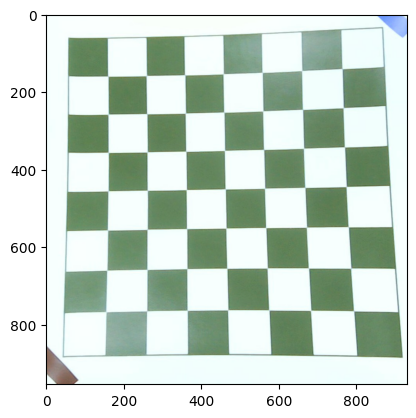

ValueError: too many values to unpack (expected 2)

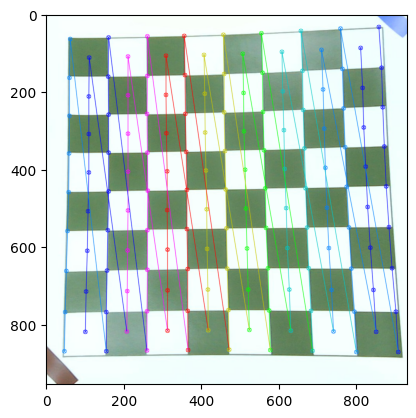

In [3]:
query = cv.imread('pics/query.jpg', cv.IMREAD_COLOR)
assert not isinstance(query, type(None))
plt.imshow(query)
plt.show()
centers, corners = get_centers(query, plot=True, return_corners=True)

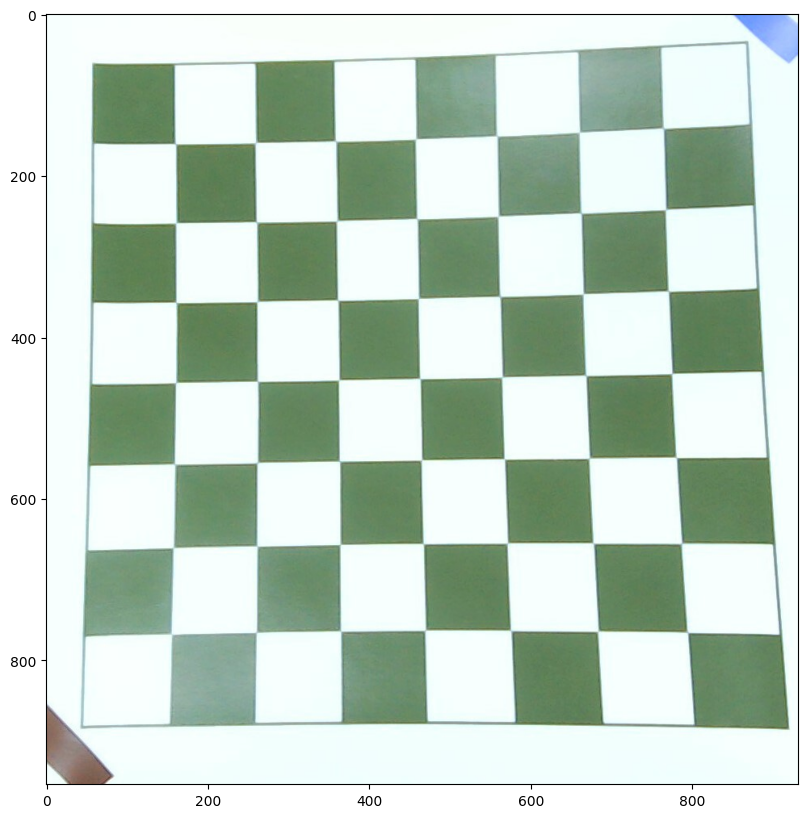

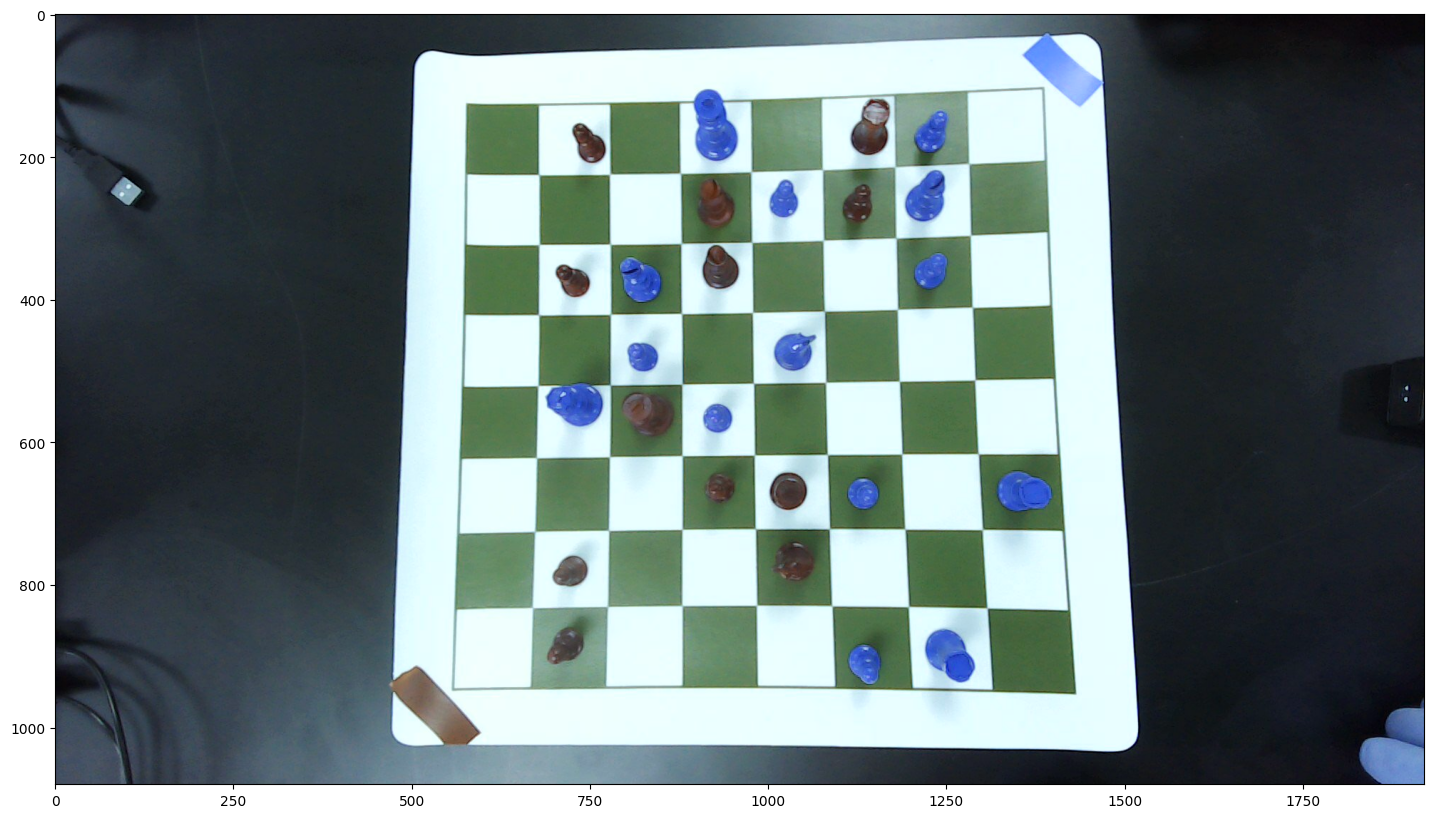

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


255
255
(954, 931, 3)


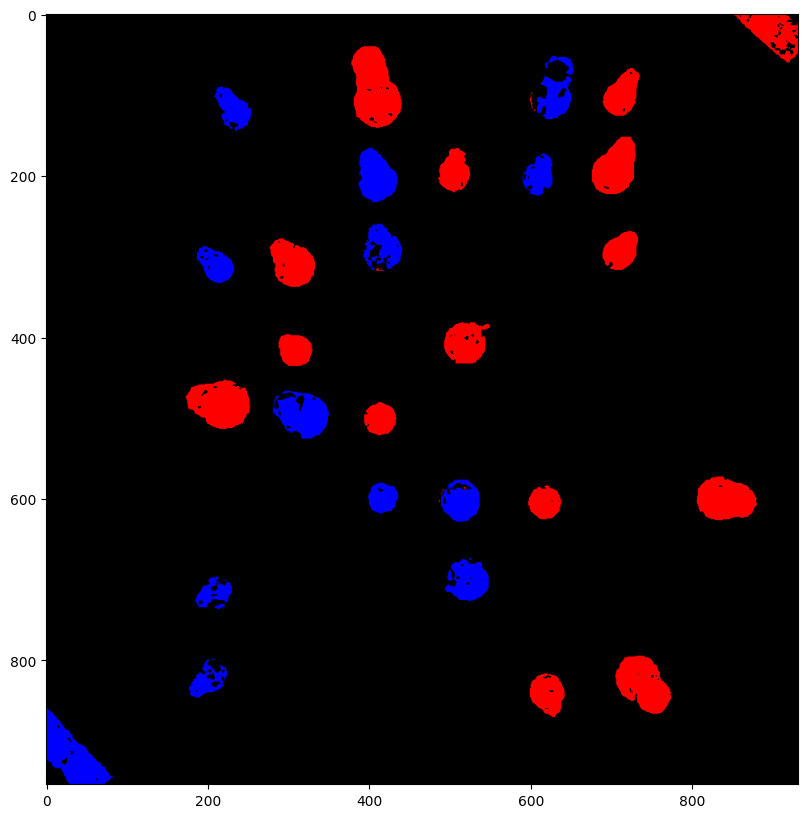

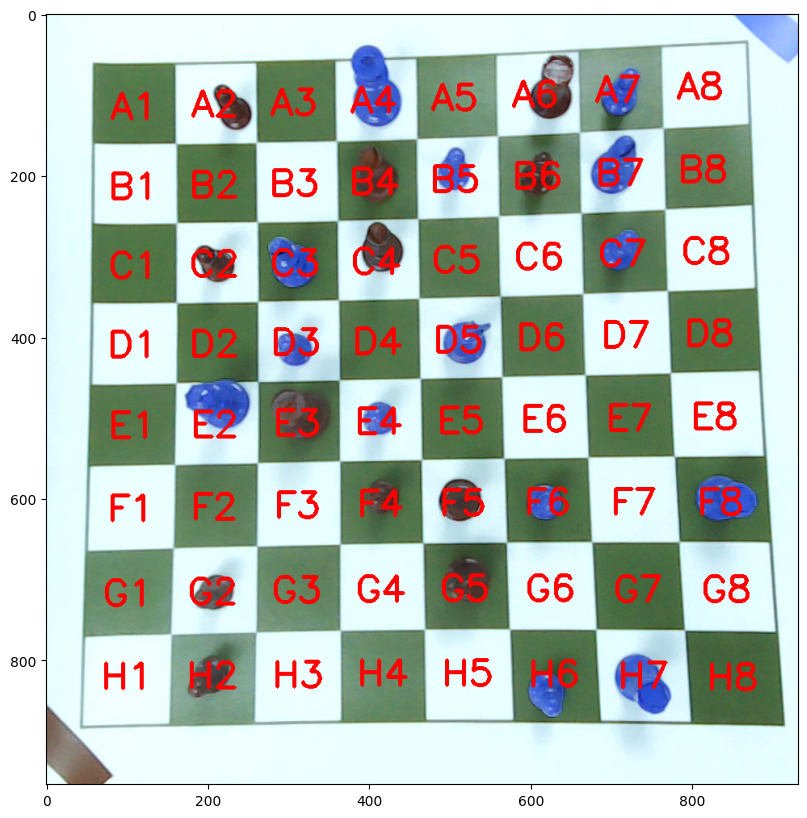

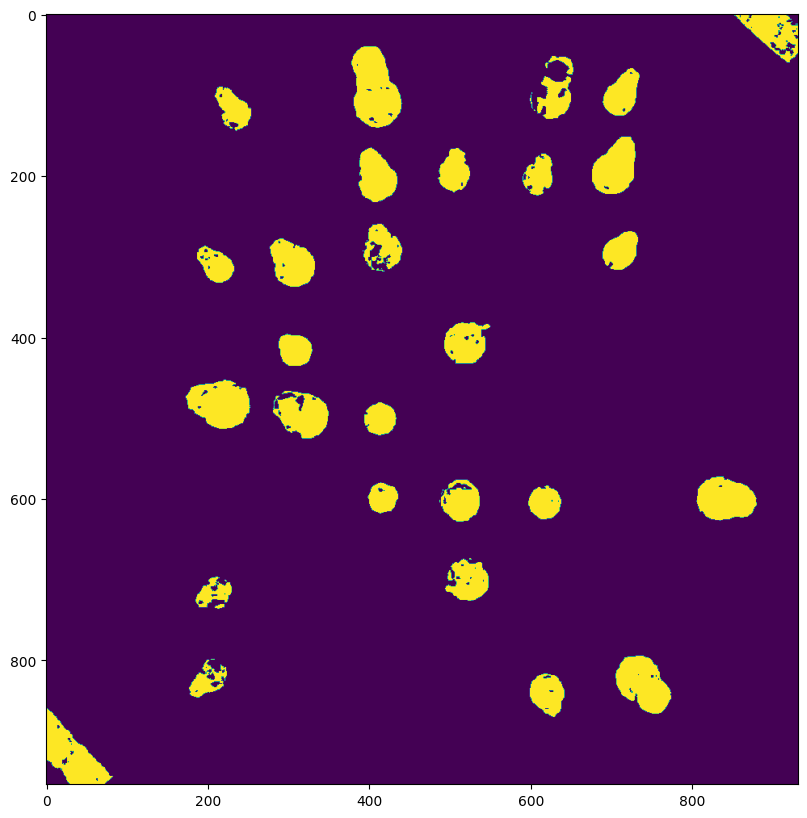

In [ ]:
reference = cv.imread(f'pics/2024-04-09-112430.jpg', cv.IMREAD_COLOR)
ret, reference, diff = get_board(query, reference, centers, corners, plot=False)
show_board_labels(reference.copy(), centers, (8,8))
plt.figure(figsize=(20,10))
plt.imshow(diff)
plt.show()